In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [20]:
num_correct_test = []

for seed in range(4):
    num_correct_test.append((np.load(f"ckpts/gsm8k_all_2epochs_llama2/test_answer_types5_seed{seed}.npy")==0).sum(axis=-1))

    
num_correct_test = np.sum(num_correct_test, axis=0)


# num_correct_test = (np.load("ckpts/gsm8k_full_orig_test_answer_types20_seed0.npy")==0).sum(axis=-1)


In [4]:
num_correct_test.max()

20

In [38]:
subsample_idxs = np.where(num_correct_test<5)[0]
# for run_type in ["hard5", "hard10", "hard15", "rand"]:
for run_type in ["hard5", "hard10", "rand"]:

    print(run_type)
    test_accs_seeds = []
    for seed in [2]:
        test_accs = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_30000/test_answer_types5_seed{str(seed)}.npy")==0).mean(axis=-1)
        test_accs_seeds.append(test_accs.mean())
    print(np.mean(test_accs_seeds), np.std(test_accs_seeds))


hard5
0.49128127369219105 0.0
hard10
0.5986353297952994 0.0
rand
0.6670204700530705 0.0


In [33]:


    
    
test_accs_all = []
# for run_type in ["hard5", "hard10", "hard15", "rand"]:
for run_type in ["hard5", "hard10", "rand"]:

    test_accs_ckpts = []
    for i in range(5):
        subsample_idxs = np.where((num_correct_test>=i*4) * (num_correct_test<(i+1)*4))[0]


        print(run_type)
        test_accs = []
        for seed in [0, 1, 2,3, 4]:
            test_accs_seed = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_30000/test_answer_types5_seed{str(seed)}.npy")==0).mean(axis=-1)
            test_accs.append(test_accs_seed)
        test_accs = np.mean(test_accs, axis=0)
                
        # test_accs = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_20000/test_answer_types5_seed2.npy")==0).mean(axis=-1)
        test_accs_ckpts.append(test_accs[subsample_idxs].mean())
    test_accs_all.append(test_accs_ckpts)


hard5
hard5
hard5
hard5
hard5
hard10
hard10
hard10
hard10
hard10
rand
rand
rand
rand
rand


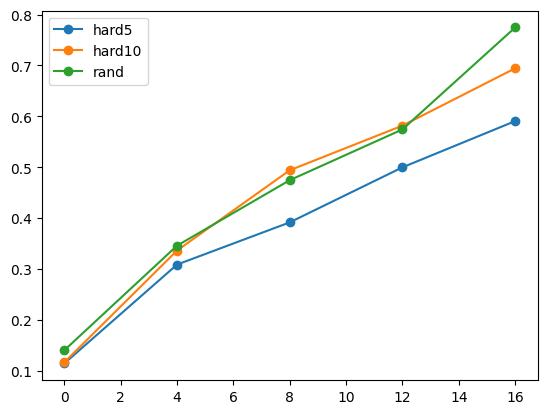

In [34]:
plt.plot(np.arange(0, 20, 4), test_accs_all[0], "o-", label="hard5")
plt.plot(np.arange(0, 20, 4), test_accs_all[1], "o-", label="hard10")
# plt.plot(np.arange(0, 20, 4), test_accs_all[2], "o-", label="hard15")
plt.plot(np.arange(0, 20, 4), test_accs_all[2],  "o-",label="rand")

plt.legend()
plt.savefig("delete.jpg")

In [24]:
subsample_idxs = np.where(num_correct_test<5)[0]
# subsample_idxs = np.where(num_correct_test>0)[0]
# subsample_idxs = np.where((num_correct_test<10)*(num_correct_test>5))[0]

for run_type in ["hard5", "hard10", "hard15", "rand"]:
    print(run_type)
    test_accs_seeds = []
    for seed in [0, 1, 2,3, 4]:
        test_accs = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_5000/test_answer_types5_seed{str(seed)}.npy")==0).mean(axis=-1)
        test_accs_seeds.append(test_accs[subsample_idxs].mean())
    print(np.mean(test_accs_seeds), np.std(test_accs_seeds))


hard5


FileNotFoundError: [Errno 2] No such file or directory: 'ckpts/gsm8k_aug_llama2_hard5_5000/test_answer_types5_seed0.npy'

In [6]:
0.03*len(subsample_idxs)

23.369999999999997

In [7]:
subsample_idxs = np.where(num_correct_test<5)[0]
for run_type in ["hard10_mixed"]:
    print(run_type)
    test_accs_seeds = []
    for seed in [0, 1, 2,3]:#, 4]:
        test_accs = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_20000/test_answer_types5_seed{str(seed)}.npy")==0).mean(axis=-1)
        test_accs_seeds.append(test_accs[subsample_idxs].mean())
    print(np.mean(test_accs_seeds), np.std(test_accs_seeds))

hard10_mixed
0.5661103979460848 0.005512428896940665


In [8]:
subsample_idxs = np.where((num_correct_test<10)*(num_correct_test>5))[0]
# subsample_idxs = np.where(num_correct_test>0)[0]

for run_type in ["hard5", "hard10", "rand"]:
    print(run_type)
    test_accs_seeds = []
    for seed in [0, 1, 2, 3, 4]:
        test_accs = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_30000/test_answer_types5_seed{str(seed)}.npy")==0).mean(axis=-1)
        test_accs_seeds.append(test_accs[subsample_idxs].mean())
    print(np.mean(test_accs_seeds), np.std(test_accs_seeds))


hard5
0.5730666666666667 0.01217355969121422
hard10
0.6661333333333334 0.013080265032992791
rand
0.7256 0.005681940200709978
